<a href="https://colab.research.google.com/github/bhavish-1/Emotion_detection_classifier/blob/master/EmotionClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Face Detection system using CNN**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/facial_expression/

/content/drive/MyDrive/facial_expression


In [ ]:
!ls

checkpoint  fer2013


In [ ]:
import os 
import numpy as np
import tensorflow as tf
from matplotlib import pyplot
import pandas as pd


In [ ]:
df = pd.read_csv('fer2013/fer2013.csv')
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [ ]:
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'} 

In [ ]:
np.array(df.pixels.loc[0].split(' ')).reshape(48,48)

array([['70', '80', '82', ..., '52', '43', '41'],
       ['65', '61', '58', ..., '56', '52', '44'],
       ['50', '43', '54', ..., '49', '56', '47'],
       ...,
       ['91', '65', '42', ..., '72', '56', '43'],
       ['77', '82', '79', ..., '105', '70', '46'],
       ['77', '72', '84', ..., '106', '109', '82']], dtype='<U3')

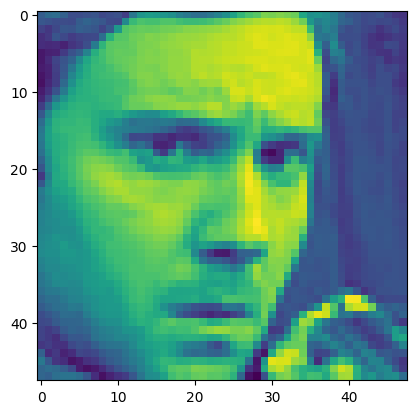

In [ ]:
pyplot.imshow(np.array(df.pixels.loc[0].split(' ')).reshape(48,48).astype('float'))

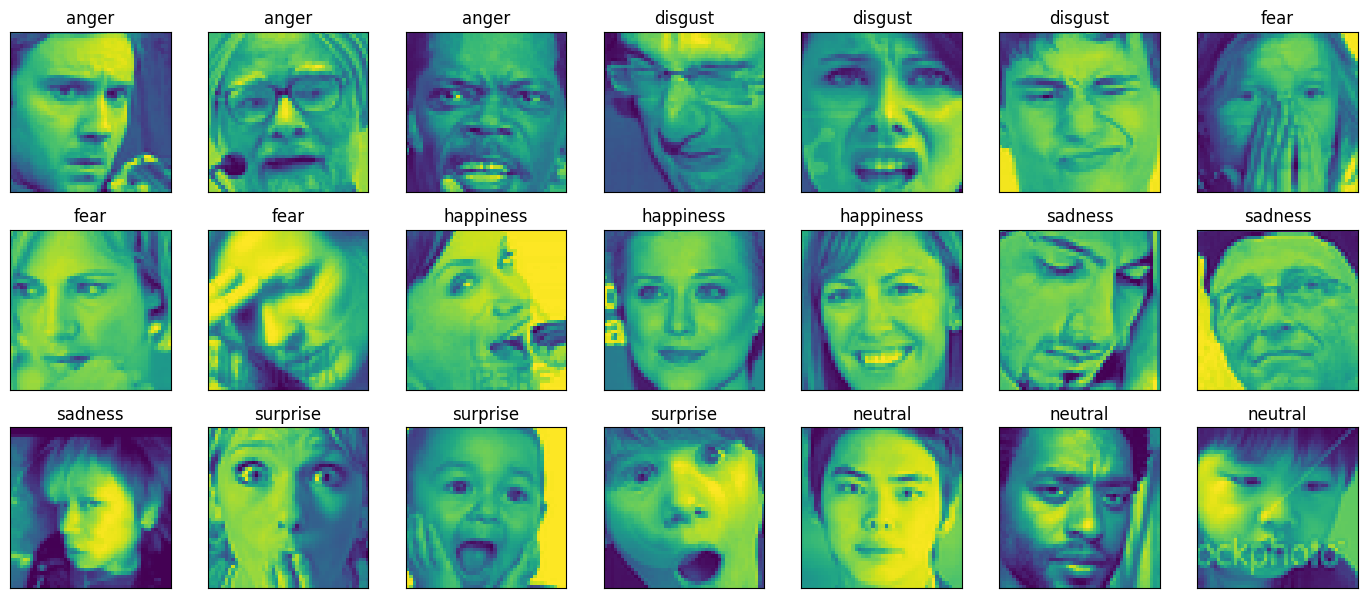

In [ ]:
fig = pyplot.figure(1, (14, 14))
k = 0
for label in sorted(df.emotion.unique()):
    for j in range(3):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = pyplot.subplot(7, 7, k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[label])
        pyplot.tight_layout()

In [ ]:
img_array = df.pixels.apply(lambda x : np.array(x.split(' ')).reshape(48, 48).astype('float32'))

In [ ]:
img_array = np.stack(img_array,axis=0)

In [ ]:
img_array = np.stack(img_array,axis=0)

In [ ]:
img_array.shape

(35887, 48, 48)

In [ ]:
lables=df.emotion.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(img_array,lables,test_size=.2)

In [ ]:
x_train.shape, x_test.shape

((28709, 48, 48), (7178, 48, 48))

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
basemodel = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(1000,activation='relu'),
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

In [ ]:
basemodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [ ]:
import os 
try:
  os.mkdir('checkpoint')
except:
  pass

In [ ]:
file_name = 'best_model.h5'

checkpoint_path = os.path.join('checkpoint',file_name)

call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                               monitor='val_accuracy',
                                               verbose=1,
                                               save_freq='epoch',
                                               save_best_only = True,
                                               save_weights_only=False,
                                               mode='max')



In [ ]:
basemodel.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
checkpoint_path

'checkpoint/best_model.h5'

In [ ]:
basemodel.fit(x_train,y_train,epochs=20,validation_split=.1,callbacks=call_back)

Epoch 1/20
808/808 [==============================] - ETA: 0s - loss: 1.8204 - accuracy: 0.2518
Epoch 1: val_accuracy improved from -inf to 0.24138, saving model to checkpoint/best_model.h5
808/808 [==============================] - 17s 7ms/step - loss: 1.8204 - accuracy: 0.2518 - val_loss: 1.8206 - val_accuracy: 0.2414
Epoch 2/20
808/808 [==============================] - ETA: 0s - loss: 1.7837 - accuracy: 0.2629
Epoch 2: val_accuracy improved from 0.24138 to 0.27133, saving model to checkpoint/best_model.h5
808/808 [==============================] - 4s 5ms/step - loss: 1.7837 - accuracy: 0.2629 - val_loss: 1.7551 - val_accuracy: 0.2713
Epoch 3/20
805/808 [============================>.] - ETA: 0s - loss: 1.6752 - accuracy: 0.3418
Epoch 3: val_accuracy improved from 0.27133 to 0.37548, saving model to checkpoint/best_model.h5
808/808 [==============================] - 4s 5ms/step - loss: 1.6754 - accuracy: 0.3416 - val_loss: 1.6105 - val_accuracy: 0.3755
Epoch 4/20
802/808 [==========

actual label is surprise
1/1 [==============================] - 0s 19ms/step
predicted label is surprise


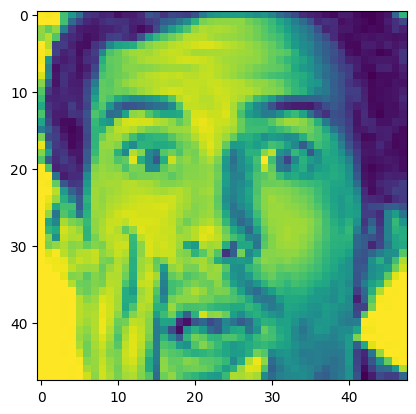

In [ ]:
final_model = tf.keras.models.load_model(checkpoint_path)
from IPython.display import clear_output
import time
for k in range(40):
  print(f'actual label is {label_to_text[y_test[k]]}')
  predicted_class = final_model.predict(tf.expand_dims(x_test[k],0)).argmax()
  print(f'predicted label is {label_to_text[predicted_class]}')
  pyplot.imshow(x_test[k].reshape((48,48)))
  pyplot.show()
  time.sleep(3)
  clear_output(wait=True)